# Data analysis recipes: Fitting a model to data

This is based on the paper https://arxiv.org/abs/1008.4686. 


The goal is to fit a set of $N$ data points, $(x_{i},y_{i})$ with known Gaussian uncertainties $\sigma_{yi}$ in the $y$-direction and perfect knowledge in the $x$-direction, i.e. $\sigma_{xi}=0$. We want to fit the data with a linear function of the form

$$f(x) = mx + b,$$

where $m,b$ are co-efficients to be determined. Naturally, the question to ask is how do we measure how good a fit is? The standard method is to minimise the distance between the points and the function, weighted by the respective standard deviation. Mathematically this is written as

$$\chi^{2} = \sum_{i=1}^{N}\left(\frac{y_{i} - f(x_{i})}{\sigma_{yi}}\right)^{2},$$

where we want to minimise this function. This means taking the following derivatives 

$$\frac{\partial \chi^{2}}{\partial m} = \frac{\partial \chi^{2}}{\partial b}=0.$$

Let us now define some matrices

$$\mathbf{Y}= \left[\begin{array}{c}y_{1} \\ y_{2} \\ \ldots \\ y_{N} \end{array}\right]$$

which is simply the $x$-values and is of the form $n\times 1$. Next define 

$$ \mathbf{A} = \left[\begin{array}{cc}1 & x_{1}  \\ 1 & x_{2} \\ \ldots \\ 1 & x_{N} \end{array}\right]$$

which is a list of the $x$-values and is of the form $n\times 2$. Finally define 

$$ \mathbf{C} = 
\left[\begin{array}{cccc}
\sigma_{y1}^{2} & 0 & \ldots & 0\\
0 & \sigma_{y2}^{2} &  \ldots & 0\\
 &  & \ldots & \\
0 & 0 & 0 &\sigma_{yN}^{2}
\end{array}\right],$$

which is the covariance matrix and has the form $n\times n$. Finally, we define

$$\mathbf{X}= \left[\begin{array}{c}b \\ m\end{array}\right],$$

Using these definitions we can rewrite $\chi^{2}$ as

$$\chi^{2} = [\mathbf{Y}-\mathbf{A}\mathbf{X}]^{T} \mathbf{C}^{-1} [\mathbf{Y}-\mathbf{A}\mathbf{X}],$$

which after minimising yields

$$\mathbf{X} = [\mathbf{A}^{T}\mathbf{C}^{-1}\mathbf{A}]^{-1}[\mathbf{A}^{T}\mathbf{C}^{-1}\mathbf{Y}].$$

Let us now solve system for some data.

To do this, we consider the first dataset given in the paper, but for the first exercise skip the first 4 data points. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

d=np.loadtxt("hogg2010.txt",skiprows=5) #skip five rows since 1st is header
N=d.shape[0]
print "There are {} data points".format(N)
y=d[:,2] #load the y data
x=d[:,1] #load the x data
cy=d[:,3] #load the sigma_y data

There are 16 data points


Let us first plot the data to get a feel for what it looks like.

(0, 700)

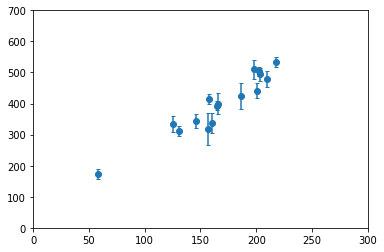

In [14]:
fig,ax = plt.subplots()
ax.errorbar(x,y,yerr=cy,fmt='o',capthick=1,capsize=2)

ax.set_xlim(0,300)
ax.set_ylim(0,700)

Now we want to find the curve that best fits these values. To do this we must define the above matrices.

In [15]:
#create Y, this is a nx1 matrix
Y=y
#create A, this is a nx2 matrix
A=np.ones((N,2))
A[:,1]=x
#create C, this is a nxn matrix
C=np.diag(cy)
Cinv=np.diag(1./cy)


Now that we have created the matrices, we can form their product

$$\mathbf{X} = [\mathbf{A}^{T}\mathbf{C}^{-1}\mathbf{A}]^{-1}[\mathbf{A}^{T}\mathbf{C}^{-1}\mathbf{Y}].$$

In [16]:
PARTA=np.dot(A.transpose(),np.dot(Cinv,A))
INVPARTA=np.linalg.inv(PARTA)
PARTB=np.dot(np.dot(A.transpose(),Cinv),Y)

#print INVPARTA
print np.dot(INVPARTA,PARTB)

[33.45048483  2.221363  ]


In [17]:
fits,covMatrix=np.polyfit(x,y,deg=1,w=1./cy,cov=True)
print fits
print np.sqrt(covMatrix[0,0])
print np.sqrt(covMatrix[1,1])

[ 2.23992083 34.04772776]
0.13447664393184905
22.76556337307023


(0, 700)

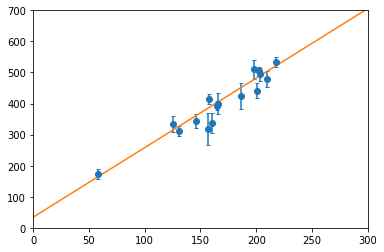

In [29]:
fig,ax = plt.subplots()
ax.errorbar(x,y,yerr=cy,fmt='o',capthick=1,capsize=2)
xp=np.linspace(0,300,1000)
ax.plot(xp,(fits[0])*xp+fits[1])
ax.set_xlim(0,300)
ax.set_ylim(0,700)